<a href="https://colab.research.google.com/github/SChandel-cmd/Cardiovascular-Disease-Prediction/blob/main/wave_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install EMD-signal

     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import wave, sys

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

gdrive/My Drive/SenseGrow/ultrasound/soundfile_bearing3.wav


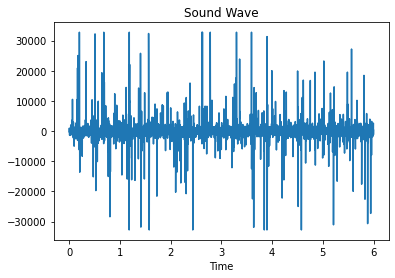

In [34]:
# directory = 'gdrive/My Drive/SenseGrow/ultrasound'
# folder = os.path.join(directory)
# print (folder)
pathtest = "gdrive/My Drive/SenseGrow/ultrasound/soundfile_bearing3.wav"

signal_path = pathtest
print (signal_path)
raw = wave.open(signal_path)
signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype ="int16")
f_rate = raw.getframerate()
time = np.linspace(
  0, # start
  len(signal) / f_rate,
  num = len(signal)
)
plt.figure(1)
plt.title("Sound Wave")
plt.xlabel("Time")
signal = signal[::20]
time = time[::20]
plt.plot(time, signal)
plt.show()


In [35]:
from PyEMD import EEMD, CEEMDAN, EMD
import numpy  as np
import pylab as plt

# Define signal
t = time
S = signal.astype(np.float64)

norm = np.linalg.norm(S)
S = S/norm
print(S)


[-0.00095103 -0.00030878  0.00400998 ...  0.01083187 -0.0049116
  0.00120217]


In [36]:
print(len(S))

3308


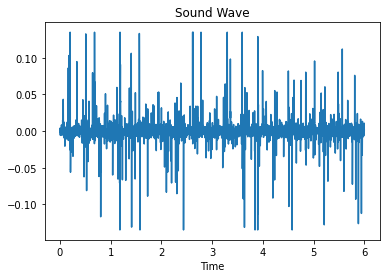

In [37]:
plt.figure(1)
plt.title("Sound Wave")
plt.xlabel("Time")
plt.plot(t, S)
plt.show()

In [38]:
print(S.dtype)
print(S)


float64
[-0.00095103 -0.00030878  0.00400998 ...  0.01083187 -0.0049116
  0.00120217]


In [39]:
print(t.dtype)

float64


In [40]:
IMF = EMD().emd(S,t)
N = IMF.shape[0]+1

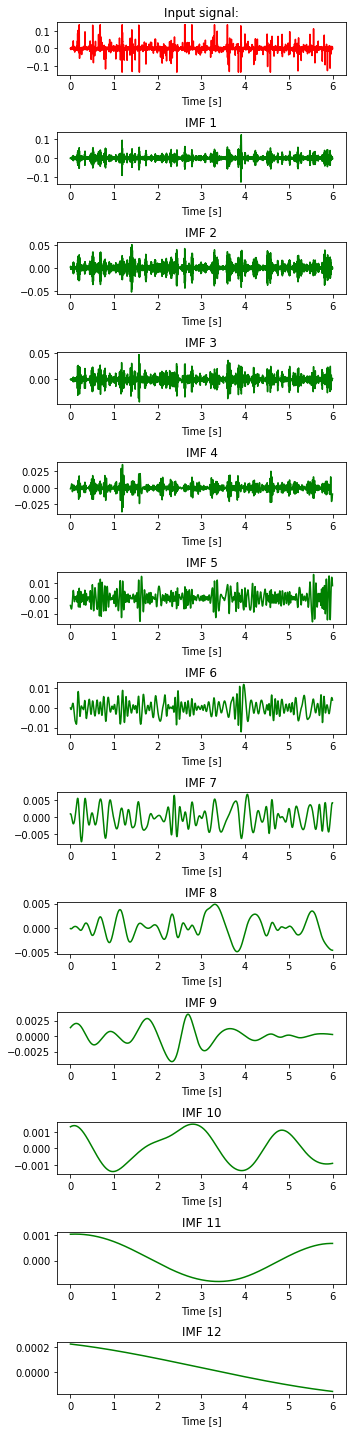

In [41]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(20)
plt.subplot(N,1,1)
plt.plot(t, S, 'r')
plt.title("Input signal:")
plt.xlabel("Time [s]")

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")

plt.tight_layout()
plt.savefig('simple_example')
plt.show()

In [42]:
eemd = EEMD()

emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = EEMD().eemd(S, t)
nIMFs = eIMFs.shape[0]

<Figure size 360x1440 with 0 Axes>

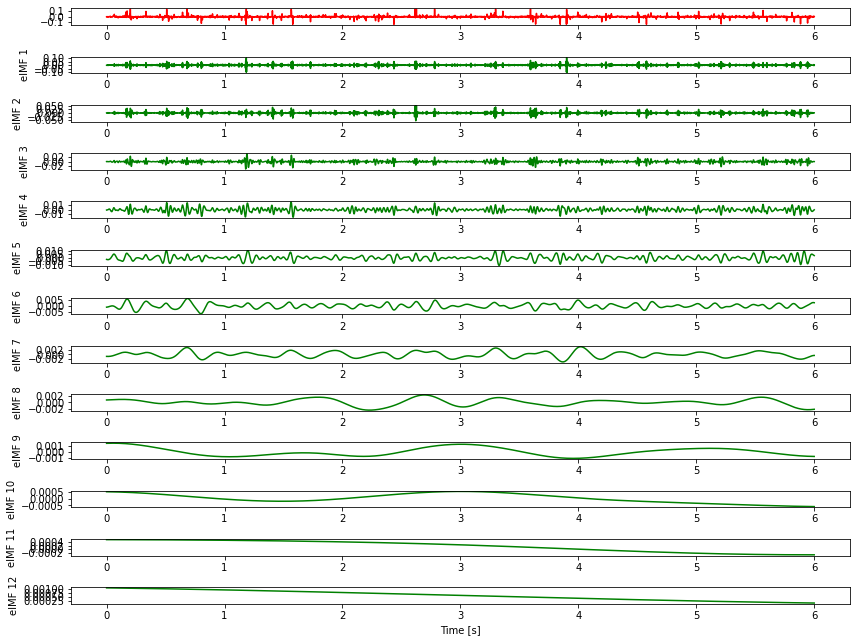

In [43]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(20)


plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

In [ ]:
ceemdan = CEEMDAN()
cIMFs = ceemdan(S,t, max_imf=1)
# ceemdan = CEEMDAN(trials= 1, spline_kind='akima')
# eIMFs = ceemdan(S, t, max_imf=1)
nIMFs = eIMFs.shape[0]

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('ceemdan_example', dpi=120)
plt.show()